In [1]:
import glob
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
import gc
import pandas as pd
#import albumentations as A
import random
from scipy.ndimage import zoom
from skimage.exposure import match_histograms
from skimage import filters, io, img_as_ubyte, img_as_float32
from skimage import data
from skimage import exposure
import h5py
import cv2
from skimage.util import invert
from skimage.filters import threshold_li
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

from skimage.measure import label
from skimage.morphology import remove_small_objects
from vedo import *
import pyvista as pv

from sklearn.metrics import precision_score, recall_score, f1_score

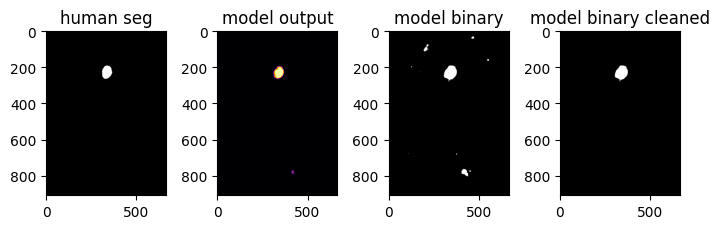

C:\Users\richa\AppData\Local\Temp\ipykernel_19680\1737580421.py:41: UserWarning: F:\validation\val_output_BARLEYWT_D_S1_R3\root_binary.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(out+"root_binary.tif", root_binary[800], check_contrast=False)
C:\Users\richa\AppData\Local\Temp\ipykernel_19680\1737580421.py:42: UserWarning: F:\validation\val_output_BARLEYWT_D_S1_R3\root_binary_clean.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(out+"root_binary_clean.tif", root_binary_clean[800], check_contrast=False)


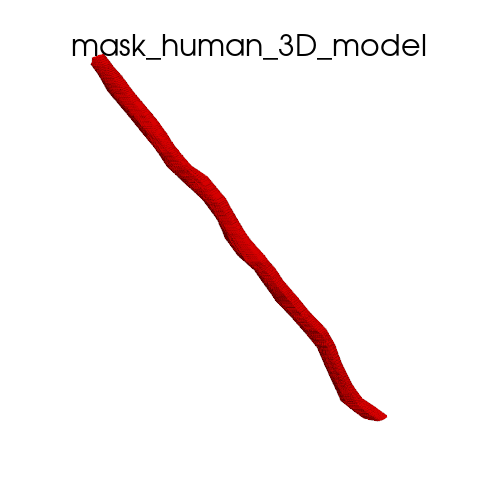

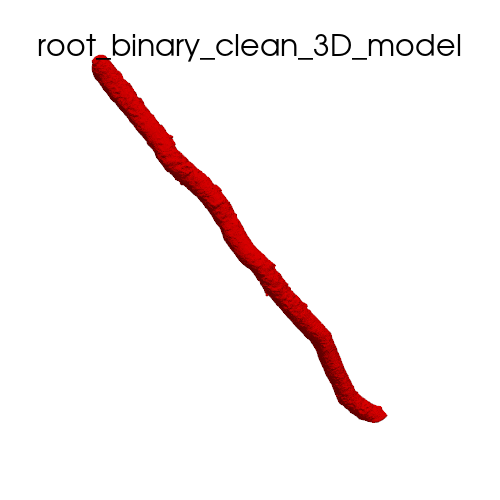

f1 score is 0.8449634267081603


In [2]:
#BARLEYWT_D_S1_R3

out='F:\\validation\\val_output_BARLEYWT_D_S1_R3\\'
Z=1
Y=1
X=1

#BARLEYWT_D_S1_R3
mask_human=skimage.io.imread('F:\\validation\\tif_to_val_model\\recon_BARLEYWT_D_S1_R3.tif.tif')
mask_DL=skimage.io.imread('F:\\validation\\pred_tif\\recon_BARLEYWT_D_S1_R3.tif_predictions.h5.tif')
raw=skimage.io.imread("F:\\validation\\raw\\recon_BARLEYWT_D_S1_R3.tif.tif")

thresh = threshold_li(mask_DL)
root_binary = mask_DL > thresh

root_binary_clean=label(root_binary)
min_size_coef=150000
root_binary_clean = remove_small_objects(root_binary_clean, min_size=min_size_coef, connectivity=2)
root_binary_clean = (root_binary_clean != 0).astype(bool)

plt.subplot(1, 4, 1)
plt.imshow(mask_human[800], cmap="gray")
plt.title("human seg")
plt.subplot(1, 4, 2)
plt.imshow(mask_DL[800], cmap="inferno")
plt.title("model output")
plt.subplot(1, 4, 3)
plt.imshow(root_binary[800], cmap="gray")
plt.title("model binary")
plt.subplot(1, 4, 4)
plt.imshow(root_binary_clean[800], cmap="gray")
plt.title("model binary cleaned")
# plt.subplot(2, 4, 5)
# plt.imshow(raw[800], cmap="gray")
# plt.title("raw")
plt.show()

skimage.io.imsave(out+"raw.tif", raw[800], check_contrast=False)
skimage.io.imsave(out+"mask_human.tif", mask_human[800], check_contrast=False)
skimage.io.imsave(out+"mask_DL.tif", mask_DL[800], check_contrast=False)
skimage.io.imsave(out+"root_binary.tif", root_binary[800], check_contrast=False)
skimage.io.imsave(out+"root_binary_clean.tif", root_binary_clean[800], check_contrast=False)

del mask_DL
del raw
gc.collect()


root_VOL = Volume(mask_human, spacing=((Z),(Y),(X)))
#root_VOL = Volume(root, spacing=(Z,Y,X))
root_ISO = root_VOL.isosurface(1)
root_ISO.write(out+"mask_human_root.stl")
    
root_STL=pv.read(out+"mask_human_root.stl")
    
pv.set_plot_theme("document")
p = pv.Plotter()
p.add_title('mask_human_3D_model', font_size=12)
p.set_background("white")
p.add_mesh(root_STL, color="red").rotate_y(90)
#p.add_mesh(plastic_STL, color="grey", opacity=0.1);
p.window_size = 500, 500
p.show(jupyter_backend='static');
p.view_yz()
#p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
p.screenshot(out+'mask_human_3D_model.png') ;


root_VOL = Volume(root_binary, spacing=((Z),(Y),(X)))
#root_VOL = Volume(root, spacing=(Z,Y,X))
root_ISO = root_VOL.isosurface(1)
root_ISO.write(out+"root_binary.stl")
    
root_STL=pv.read(out+"root_binary.stl")
    
# pv.set_plot_theme("document")
# p = pv.Plotter()
# p.set_background("white")
# p.add_mesh(root_STL, color="red").rotate_y(90)
# #p.add_mesh(plastic_STL, color="grey", opacity=0.1);
# p.window_size = 500, 500
# p.show(jupyter_backend='static');
# p.view_yz()
# #p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
# p.screenshot(out+'root_binary_3D_model.png') ;


root_VOL = Volume(root_binary_clean, spacing=((Z),(Y),(X)))
#root_VOL = Volume(root, spacing=(Z,Y,X))
root_ISO = root_VOL.isosurface(1)
root_ISO.write(out+"root_binary_clean.stl")
    
root_STL=pv.read(out+"root_binary_clean.stl")
    
pv.set_plot_theme("document")
p = pv.Plotter()
p.add_title('root_binary_clean_3D_model', font_size=12)
p.set_background("white")
p.add_mesh(root_STL, color="red").rotate_y(90)
#p.add_mesh(plastic_STL, color="grey", opacity=0.1);
p.window_size = 500, 500
p.show(jupyter_backend='static');
p.view_yz()
#p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
p.screenshot(out+'root_binary_clean_3D_model.png') ;

#QC metrics
flat_predictions = root_binary_clean.flatten()
flat_ground_truths = mask_human.flatten()
f1 = f1_score(flat_ground_truths, flat_predictions, average='binary')

precision = precision_score(flat_ground_truths, flat_predictions, average='binary')  # or 'micro', 'weighted', etc.
recall = recall_score(flat_ground_truths, flat_predictions, average='binary') 

qc_metrics = {'QC_test': ['precision', 'recall', 'f1'],
        'QC_result': [precision, recall, f1]}
qc_metrics = pd.DataFrame(qc_metrics)
qc_metrics.to_csv(out+"qc_metrics.csv") 

print ("f1 score is "+ str(f1))

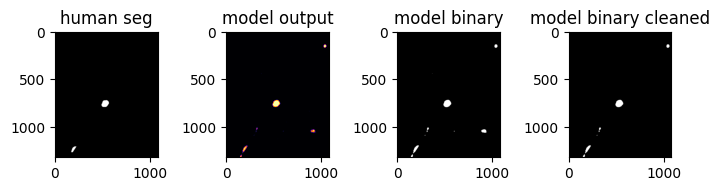

C:\Users\richa\AppData\Local\Temp\ipykernel_19680\2449731996.py:42: UserWarning: F:\validation\val_output_recon_W1_WW_S1_R3.tif\root_binary.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(out+"root_binary.tif", root_binary[800], check_contrast=False)
C:\Users\richa\AppData\Local\Temp\ipykernel_19680\2449731996.py:43: UserWarning: F:\validation\val_output_recon_W1_WW_S1_R3.tif\root_binary_clean.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(out+"root_binary_clean.tif", root_binary_clean[800], check_contrast=False)


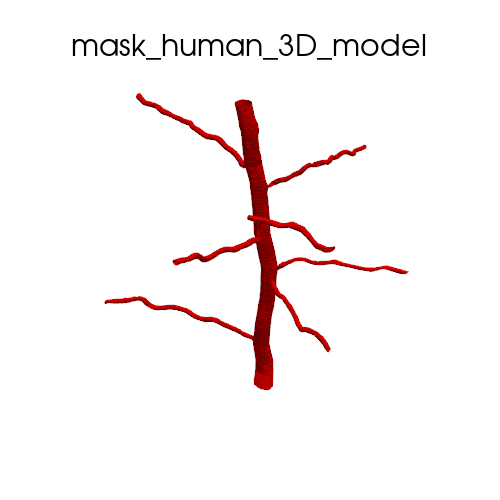

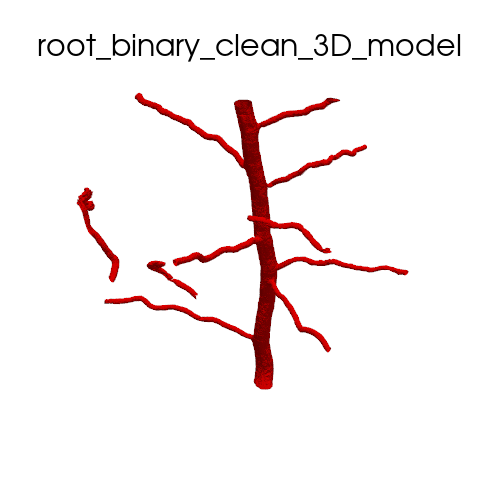

f1 score is 0.8793474183869554


In [5]:
#recon_W1_WW_S1_R3.tif_predictions.h5

out='F:\\validation\\val_output_recon_W1_WW_S1_R3.tif\\'
Z=1
Y=1
X=1

mask_human=skimage.io.imread('F:\\validation\\tif_to_val_model\\recon_W1_WW_S1_R3.tif.tif')
mask_DL=skimage.io.imread('F:\\validation\\pred_tif\\recon_W1_WW_S1_R3.tif_predictions.h5.tif')
raw=skimage.io.imread("F:\\validation\\raw\\recon_W1_WW_S1_R3.tif.tif")

thresh = threshold_li(mask_DL)
root_binary = mask_DL > thresh

root_binary_clean=label(root_binary)
min_size_coef=150000
root_binary_clean = remove_small_objects(root_binary_clean, min_size=min_size_coef, connectivity=2)
root_binary_clean = (root_binary_clean != 0).astype(bool)


plt.subplot(1, 4, 1)
plt.imshow(mask_human[800], cmap="gray")
plt.title("human seg")
plt.subplot(1, 4, 2)
plt.imshow(mask_DL[800], cmap="inferno")
plt.title("model output")
plt.subplot(1, 4, 3)
plt.imshow(root_binary[800], cmap="gray")
plt.title("model binary")
plt.subplot(1, 4, 4)
plt.imshow(root_binary_clean[800], cmap="gray")
plt.title("model binary cleaned")
# plt.subplot(2, 4, 5)
# plt.imshow(raw[800], cmap="gray")
# plt.title("raw")
plt.show()


skimage.io.imsave(out+"raw.tif", raw[800], check_contrast=False)
skimage.io.imsave(out+"mask_human.tif", mask_human[800], check_contrast=False)
skimage.io.imsave(out+"mask_DL.tif", mask_DL[800], check_contrast=False)
skimage.io.imsave(out+"root_binary.tif", root_binary[800], check_contrast=False)
skimage.io.imsave(out+"root_binary_clean.tif", root_binary_clean[800], check_contrast=False)

del mask_DL
del raw
gc.collect()

root_VOL = Volume(mask_human, spacing=((Z),(Y),(X)))
#root_VOL = Volume(root, spacing=(Z,Y,X))
root_ISO = root_VOL.isosurface(1)
root_ISO.write(out+"mask_human_root.stl")
    
root_STL=pv.read(out+"mask_human_root.stl")
    
pv.set_plot_theme("document")
p = pv.Plotter()
p.add_title('mask_human_3D_model', font_size=12)
p.set_background("white")
p.add_mesh(root_STL, color="red").rotate_y(90)
#p.add_mesh(plastic_STL, color="grey", opacity=0.1);
p.window_size = 500, 500
p.show(jupyter_backend='static');
p.view_yz()
#p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
p.screenshot(out+'mask_human_3D_model.png') ;


root_VOL = Volume(root_binary, spacing=((Z),(Y),(X)))
#root_VOL = Volume(root, spacing=(Z,Y,X))
root_ISO = root_VOL.isosurface(1)
root_ISO.write(out+"root_binary.stl")
    
root_STL=pv.read(out+"root_binary.stl")
    
# pv.set_plot_theme("document")
# p = pv.Plotter()
# p.set_background("white")
# p.add_mesh(root_STL, color="red").rotate_y(90)
# #p.add_mesh(plastic_STL, color="grey", opacity=0.1);
# p.window_size = 500, 500
# p.show(jupyter_backend='static');
# p.view_yz()
# #p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
# p.screenshot(out+'root_binary_3D_model.png') ;


root_VOL = Volume(root_binary_clean, spacing=((Z),(Y),(X)))
#root_VOL = Volume(root, spacing=(Z,Y,X))
root_ISO = root_VOL.isosurface(1)
root_ISO.write(out+"root_binary_clean.stl")
    
root_STL=pv.read(out+"root_binary_clean.stl")
    
pv.set_plot_theme("document")
p = pv.Plotter()
p.add_title('root_binary_clean_3D_model', font_size=12)
p.set_background("white")
p.add_mesh(root_STL, color="red").rotate_y(90)
#p.add_mesh(plastic_STL, color="grey", opacity=0.1);
p.window_size = 500, 500
p.show(jupyter_backend='static');
p.view_yz()
#p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
p.screenshot(out+'root_binary_clean_3D_model.png') ;


#QC metrics
flat_predictions = root_binary_clean.flatten()
flat_ground_truths = mask_human.flatten()
f1 = f1_score(flat_ground_truths, flat_predictions, average='binary')

precision = precision_score(flat_ground_truths, flat_predictions, average='binary')  # or 'micro', 'weighted', etc.
recall = recall_score(flat_ground_truths, flat_predictions, average='binary') 

qc_metrics = {'QC_test': ['precision', 'recall', 'f1'],
        'QC_result': [precision, recall, f1]}
qc_metrics = pd.DataFrame(qc_metrics)
qc_metrics.to_csv(out+"qc_metrics.csv") 

print ("f1 score is "+ str(f1))